In [6]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
url='https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Auto.csv'
df=pd.read_csv(url, na_values='?')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
83,28.0,4,98.0,80.0,2164,15.0,72,1,dodge colt (sw)
192,22.0,6,250.0,105.0,3353,14.5,76,1,chevrolet nova
313,28.0,4,151.0,90.0,2678,16.5,80,1,chevrolet citation
241,22.0,6,146.0,97.0,2815,14.5,77,3,datsun 810
173,24.0,4,119.0,97.0,2545,17.0,75,3,datsun 710
357,32.9,4,119.0,100.0,2615,14.8,81,3,datsun 200sx
311,32.1,4,98.0,70.0,2120,15.5,80,1,chevrolet chevette
30,28.0,4,140.0,90.0,2264,15.5,71,1,chevrolet vega 2300


In [3]:
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                    

In [4]:
df.dropna(inplace=True)

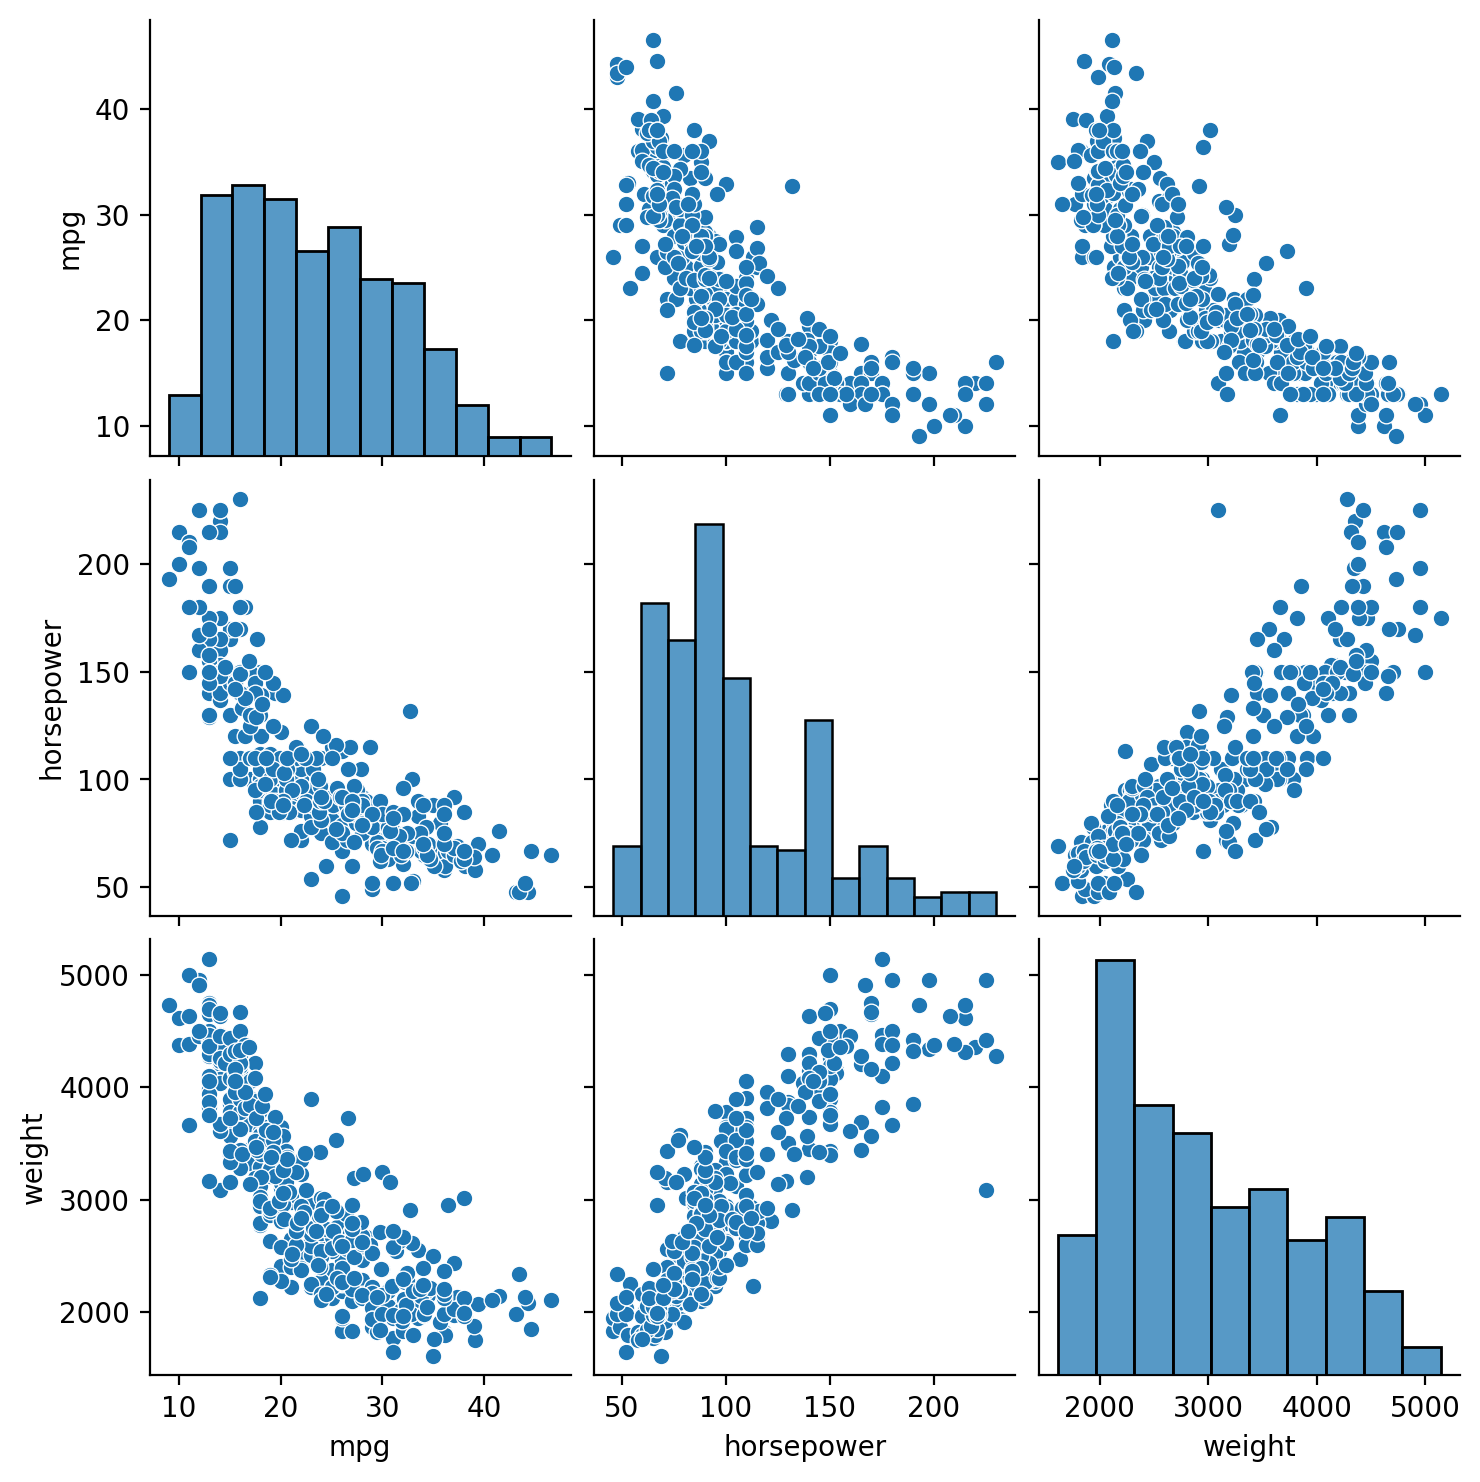

In [7]:
sns.pairplot(df[['mpg','horsepower','weight']])


In [9]:
df[['mpg','horsepower','weight']].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


#### scikit-learn

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
# x_col=['horsepower']
x_col=['horsepower','weight']
y_col='mpg'

In [12]:
X=df[x_col]
y=df[y_col]

In [13]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    random_state=1)

#### Linear regression

In [14]:
lm = LinearRegression()
lm

LinearRegression()

In [15]:
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
lm.intercept_, lm.coef_

(44.822470583215576, array([-0.04898144, -0.00553451]))

In [17]:
lm.score(X_train, y_train) # R-squared

0.6932437089290189

In [18]:
lm.score(X_test, y_test) # R-squared

0.7292547386704167

#### polynomial regression

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

pm = LinearRegression()
pm.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
poly.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [22]:
X_train_poly[:3]

array([[1.0000e+00, 8.8000e+01, 2.5000e+03, 7.7440e+03, 2.2000e+05,
        6.2500e+06],
       [1.0000e+00, 8.2000e+01, 2.7200e+03, 6.7240e+03, 2.2304e+05,
        7.3984e+06],
       [1.0000e+00, 5.2000e+01, 2.1300e+03, 2.7040e+03, 1.1076e+05,
        4.5369e+06]])

In [23]:
X_train[:3]

,horsepower,weight
335,88.0,2500
396,82.0,2720
393,52.0,2130


In [25]:
poly.get_feature_names_out()

array(['1', 'horsepower', 'weight', 'horsepower^2', 'horsepower weight',
       'weight^2'], dtype=object)

In [26]:
X_train_poly[:3]

array([[1.0000e+00, 8.8000e+01, 2.5000e+03, 7.7440e+03, 2.2000e+05,
        6.2500e+06],
       [1.0000e+00, 8.2000e+01, 2.7200e+03, 6.7240e+03, 2.2304e+05,
        7.3984e+06],
       [1.0000e+00, 5.2000e+01, 2.1300e+03, 2.7040e+03, 1.1076e+05,
        4.5369e+06]])

In [27]:
h=88
w=2500
1, h**1, w**1, h**2, h*w, w**2

(1, 88, 2500, 7744, 220000, 6250000)

In [28]:
pm.intercept_, pm.coef_

(60.999638119950276,
 array([ 0.00000000e+00, -2.71309036e-01, -8.77290010e-03,  2.15169279e-04,
         4.22566829e-05, -3.58954388e-08]))

In [29]:
pm.score(X_train_poly, y_train) # R-sq

0.7344640327916464

In [30]:
pm.score(X_test_poly, y_test)

0.7734567578503593

In [31]:
X_test[:3]

,horsepower,weight
82,97.0,2506
167,75.0,2171
356,75.0,2350


In [32]:
X_test_poly[:3]

array([[1.000000e+00, 9.700000e+01, 2.506000e+03, 9.409000e+03,
        2.430820e+05, 6.280036e+06],
       [1.000000e+00, 7.500000e+01, 2.171000e+03, 5.625000e+03,
        1.628250e+05, 4.713241e+06],
       [1.000000e+00, 7.500000e+01, 2.350000e+03, 5.625000e+03,
        1.762500e+05, 5.522500e+06]])

In [33]:
pm.intercept_ + sum((pm.coef_ * X_test_poly[0]))

24.768716059086074

In [34]:
lm.predict(X_test[:3])

array([26.20179173, 29.13344391, 28.14276685])

In [35]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [36]:
y_test[:3]

82     23.0
167    29.0
356    32.4
Name: mpg, dtype: float64

In [38]:
pm.predict(poly.fit_transform([[97, 2506]]))

array([24.76871606])

In [39]:
pm.predict(poly.fit_transform([[97, 2506],
                                [75,2171],
                                [75, 2350]]))

array([24.76871606, 29.52708203, 28.49498017])

In [40]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

#### pipeline

In [41]:
from sklearn.pipeline import make_pipeline
degree=2
pm2=make_pipeline(PolynomialFeatures(degree), LinearRegression(), verbose=True)
pm2.fit(X_train, y_train)

[Pipeline]  (step 1 of 2) Processing polynomialfeatures, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.0s


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())],
         verbose=True)

In [43]:
pm2.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'verbose': True,
 'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__positive': False}

In [45]:
pm2.score(X_train, y_train)

0.7344640327916464

In [46]:
pm2.score(X_test, y_test)

0.7734567578503593

In [48]:
X_test[:3]

,horsepower,weight
82,97.0,2506
167,75.0,2171
356,75.0,2350


In [49]:
pm2.predict(X_test[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [51]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

#### statsmodels

###### method 1 (using R formula style)

In [52]:
dt=X_train.copy()
dt[y_col]=y_train
dt[:5]

,horsepower,weight,mpg
335,88.0,2500,35.0
396,82.0,2720,31.0
393,52.0,2130,44.0
29,88.0,2130,27.0
275,125.0,3140,17.0


In [53]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [54]:
import statsmodels.formula.api as smf
formula = 'mpg ~ horsepower + weight + I(horsepower**2) + horsepower * weight + I(weight**2)'
model1 = smf.ols(formula=formula, data=dt)
model1_fit=model1.fit()

In [57]:
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           5.09e-75
Time:                        16:46:25   Log-Likelihood:                -764.10
No. Observations:                 274   AIC:                             1540.
Df Residuals:                     268   BIC:                             1562.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.9996      3

In [58]:
pm.intercept_, pm.coef_

(60.999638119950276,
 array([ 0.00000000e+00, -2.71309036e-01, -8.77290010e-03,  2.15169279e-04,
         4.22566829e-05, -3.58954388e-08]))

In [59]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [60]:
model1_fit.predict(X_test[:3])

82     24.768716
167    29.527082
356    28.494980
dtype: float64

In [62]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [61]:
pm2.predict(X_test[:3])

array([24.76871606, 29.52708203, 28.49498017])

###### method 2 (use sm.OLS)

In [65]:
import statsmodels.api as sm

model2 = sm.OLS(y_train, X_train_poly)

model2_fit=model2.fit()
print(model2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           5.09e-75
Time:                        16:49:54   Log-Likelihood:                -764.10
No. Observations:                 274   AIC:                             1540.
Df Residuals:                     268   BIC:                             1562.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.9996      3.604     16.924      0.0

In [66]:
model2_fit.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [67]:
model1_fit.predict(X_test[:3])

82     24.768716
167    29.527082
356    28.494980
dtype: float64

In [68]:
pm.predict(X_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [69]:
pm2.predict(X_test[:3])

array([24.76871606, 29.52708203, 28.49498017])